<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Motivating--The-Bayesian-Classifier-🧐" data-toc-modified-id="Motivating--The-Bayesian-Classifier-🧐-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Motivating  The Bayesian Classifier 🧐</a></span><ul class="toc-item"><li><span><a href="#Naive-Bayes-Setup" data-toc-modified-id="Naive-Bayes-Setup-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Naive Bayes Setup</a></span><ul class="toc-item"><li><span><a href="#What's-So-Great-About-This?" data-toc-modified-id="What's-So-Great-About-This?-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>What's So Great About This?</a></span></li></ul></li><li><span><a href="#The-Naive-Assumption" data-toc-modified-id="The-Naive-Assumption-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The Naive Assumption</a></span></li><li><span><a href="#The-Formula" data-toc-modified-id="The-Formula-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>The Formula</a></span><ul class="toc-item"><li><span><a href="#What-Parts-Can-We-Find?" data-toc-modified-id="What-Parts-Can-We-Find?-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>What Parts Can We Find?</a></span></li></ul></li><li><span><a href="#Calculating-That-Our-Email-Is-Spam" data-toc-modified-id="Calculating-That-Our-Email-Is-Spam-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Calculating That Our Email Is Spam</a></span></li><li><span><a href="#Extending-It-With-Multiple-Words" data-toc-modified-id="Extending-It-With-Multiple-Words-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Extending It With Multiple Words</a></span></li></ul></li><li><span><a href="#Naive-Bayes-Modeling-Example" data-toc-modified-id="Naive-Bayes-Modeling-Example-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Naive Bayes Modeling Example</a></span><ul class="toc-item"><li><span><a href="#Using-Bayes's-Theorem-for-Classification" data-toc-modified-id="Using-Bayes's-Theorem-for-Classification-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Using Bayes's Theorem for Classification</a></span><ul class="toc-item"><li><span><a href="#Does-this-look-like-a-classification-problem?" data-toc-modified-id="Does-this-look-like-a-classification-problem?-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Does this look like a classification problem?</a></span></li></ul></li><li><span><a href="#Elephant-Example" data-toc-modified-id="Elephant-Example-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Elephant Example</a></span><ul class="toc-item"><li><span><a href="#Naive-Bayes-by-Hand" data-toc-modified-id="Naive-Bayes-by-Hand-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Naive Bayes by Hand</a></span></li><li><span><a href="#Calculation-of-Likelihoods" data-toc-modified-id="Calculation-of-Likelihoods-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Calculation of Likelihoods</a></span></li><li><span><a href="#Posteriors" data-toc-modified-id="Posteriors-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Posteriors</a></span></li><li><span><a href="#More-Dimensions" data-toc-modified-id="More-Dimensions-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>More Dimensions</a></span></li><li><span><a href="#GaussianNB" data-toc-modified-id="GaussianNB-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span><a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html" target="_blank"><code>GaussianNB</code></a></a></span></li></ul></li><li><span><a href="#Comma-Survey-Example" data-toc-modified-id="Comma-Survey-Example-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Comma Survey Example</a></span><ul class="toc-item"><li><span><a href="#Calculating-Priors-and-Likelihoods" data-toc-modified-id="Calculating-Priors-and-Likelihoods-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Calculating Priors and Likelihoods</a></span></li><li><span><a href="#Calculating-Posteriors" data-toc-modified-id="Calculating-Posteriors-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Calculating Posteriors</a></span></li><li><span><a href="#Comparison-with-MultinomialNB" data-toc-modified-id="Comparison-with-MultinomialNB-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Comparison with <a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html" target="_blank"><code>MultinomialNB</code></a></a></span></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.naive_bayes import MultinomialNB, GaussianNB
    # There is also a BernoulliNB for a dataset with binary predictors
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

# Objectives

- Describe how Bayes's Theorem can be used to make predictions of a target
- Identify the appropriate variant of Naive Bayes models for a particular business problem

# Motivating  The Bayesian Classifier 🧐

> Let's take a second to go through an example to get a feel for how Bayes' Theorem can help us with classification. Specifically about document classification

Spam, Spam, Spam, Spam, Spam...

![Many cans of spam](images/wall_of_spam.jpeg)

> This is the classic example: detecting email spam!

**The Problem Setup**

> We get emails that can be either emails we care about (***ham*** 🐷) or emails we don't care about (***spam*** 🥫). 
>
> We can probably look at the words in the email and get an idea of whether they are spam or not just by observing if they contain red-flag words 🚩
> 
> We won't always be right, but if we see an email that uses word(s) that are more often associated with spam, then we can feel more confident as labeling that email as spam!

## Naive Bayes Setup

What we gotta do:

1. Look at spam and not spam (ham) emails
2. Identify words that suggest classification
3. Determine probability that words occur in each classification
4. Profit (classify new emails as "spam" or "ham")

### What's So Great About This?

- We can keep updating our belief based on the emails we detect
- Relatively simple
- Can expand to multiple words

## The Naive Assumption

$P(A,B) = P(A\cap B) = P(A)\ P(B)$ only if independent 

In practice, makes sense & is usually pretty good assumption

## The Formula

Let's say the word that occurs is "cash":

$$ P(🥫 | "cash") = \frac{P("cash" | 🥫)P(🥫)}{P("cash")}$$

### What Parts Can We Find?

- $P("cash")$
    * That's just the probability of finding the word "cash"! Frequency of the word!
- $P(🥫)$
    * Well, we start with some data (_prior knowledge_). So frequency of the spam occurring!
- $P("cash" | 🥫)$
    * How frequently is "cash" used in a known spam emails. Count the frequency across all spam emails
    

## Calculating That Our Email Is Spam

In [2]:
# Let's just say 2% of all emails have the word "cash" in them
p_cash = 0.02

# We normally would measure this from our data, but we'll take 
# it that 10% of all emails we collected were spam
p_spam = 0.10

# 12% of all spam emails have the word "cash"
p_cash_given_its_spam = 0.12

In [3]:
p_spam_given_cash = p_cash_given_its_spam * p_spam / p_cash
print(f'If the email has the word "cash" in it, there is a {p_spam_given_cash*100}% chance the email is spam')

If the email has the word "cash" in it, there is a 60.0% chance the email is spam


> **Check it**: Does this make sense?

## Extending It With Multiple Words

> With more words, the more certain we can be if it is/isn't spam

Spam:

$$ P(🥫\ |"buy",\ "cash") \propto P("buy",\ "cash"|\ 🥫)\ P(🥫)$$


But because of independence: 
    
$$ P("buy",\ "cash"|\ 🥫) = P("buy"|\ 🥫)\ P("cash"|\ 🥫)$$

Normalize by dividing!

$$
P(🥫\ |"buy",\ "cash")  =
    \frac
        {P("buy"|\ 🥫)P("cash"|\ 🥫)\ P(🥫)}
        {P("buy"|\ 🥫)P("cash"|\ 🥫)\ P(🥫) + P("buy"|\ 🐷)P("cash"|\ 🐷)\ P(🐷)}
$$



> **Note:** If we wanted to find the most probable class (especially useful for _multiclass_), we find the maximum numerator for the given criteria

# Naive Bayes Modeling Example

## Using Bayes's Theorem for Classification

Let's recall Bayes's Theorem:

$\large P(h|e) = \frac{P(h)P(e|h)}{P(e)}$

### Does this look like a classification problem?

- Suppose we have three competing hypotheses $\{h_1, h_2, h_3\}$ that would explain our evidence $e$.
    - Then we could use Bayes's Theorem to calculate the posterior probabilities for each of these three:
        - $P(h_1|e) = \frac{P(h_1)P(e|h_1)}{P(e)}$
        - $P(h_2|e) = \frac{P(h_2)P(e|h_2)}{P(e)}$
        - $P(h_3|e) = \frac{P(h_3)P(e|h_3)}{P(e)}$
        
- Suppose the evidence is a collection of elephant weights.
- Suppose each of the three hypotheses claims that the elephant whose measurements we have belongs to one of the three extant elephant species (*L. africana*, *L. cyclotis*, and *E. maximus*).

In that case the left-hand sides of these equations represent the probability that the elephant in question belongs to a given species.

If we think of the species as our target, then **this is just an ordinary classification problem**.

What about the right-hand sides of the equations? **These other probabilities we can calculate from our dataset.**

- The priors can simply be taken to be the percentages of the different classes in the dataset.
- What about the likelihoods?
    - If the relevant features are **categorical**, we can simply count the numbers of each category in the dataset. For example, if the features are whether the elephant has tusks or not, then, to calculate the likelihoods, we'll just count the tusked and non-tuksed elephants per species.
    - If the relevant features are **numerical**, we'll have to do something else. A good way of proceeding is to rely on (presumed) underlying distributions of the data. [Here](https://medium.com/analytics-vidhya/use-naive-bayes-algorithm-for-categorical-and-numerical-data-classification-935d90ab273f) is an example of using the normal distribution to calculate likelihoods. We'll follow this idea below for our elephant data.

## Elephant Example

Suppose we have a dataset that looks like this:

In [4]:
elephs = pd.read_csv('data/elephants.csv', usecols=['height (cm)',
                                                   'species'])

In [5]:
elephs.head()

,height (cm),species
0,231.683867,maximus
1,277.714843,cyclotis
2,268.228131,africana
3,267.334322,cyclotis
4,270.165582,maximus


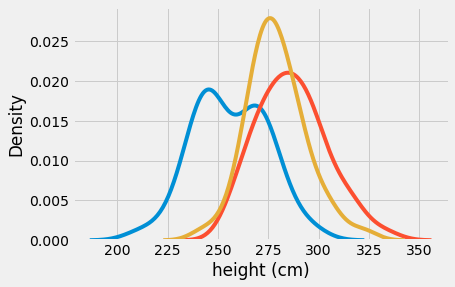

In [6]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

sns.kdeplot(data=elephs[elephs['species'] == 'maximus']['height (cm)'],
            ax=ax, label='maximus')
sns.kdeplot(data=elephs[elephs['species'] == 'africana']['height (cm)'],
            ax=ax, label='africana')
sns.kdeplot(data=elephs[elephs['species'] == 'cyclotis']['height (cm)'],
            ax=ax, label='cyclotis');

### Naive Bayes by Hand

Suppose we want to make prediction of species for some new elephant whose weight we've just recorded. We'll suppose the new elephant has:

In [7]:
new_ht = 263

What we want to calculate is the mean and standard deviation for height for each elephant species. We'll use these to calculate the relevant likelihoods.

So:

In [8]:
max_stats = elephs[elephs['species'] == 'maximus'].describe().loc[['mean', 'std'], :]
max_stats

,height (cm)
mean,256.143764
std,18.270532


In [9]:
cyc_stats = elephs[elephs['species'] == 'cyclotis'].describe().loc[['mean', 'std'], :]
cyc_stats

,height (cm)
mean,278.993125
std,14.669292


In [10]:
afr_stats = elephs[elephs['species'] == 'africana'].describe().loc[['mean', 'std'], :]
afr_stats

,height (cm)
mean,286.642016
std,17.127223


In [11]:
elephs['species'].value_counts()

cyclotis    50
africana    50
maximus     50
Name: species, dtype: int64

### Calculation of Likelihoods

We'll use the PDFs of the normal distributions with the discovered means and standard deviations to calculate likelihoods:

In [12]:
stats.norm(loc=max_stats['height (cm)'][0],
           scale=max_stats['height (cm)'][1]).pdf(263)

0.020350724281546377

In [13]:
stats.norm(loc=cyc_stats['height (cm)'][0],
          scale=cyc_stats['height (cm)'][1]).pdf(263)

0.015010397188804914

In [14]:
stats.norm(loc=afr_stats['height (cm)'][0],
          scale=afr_stats['height (cm)'][1]).pdf(263)

0.008983844678436815

### Posteriors

What we have just calculated are the likelihoods, i.e.:

- $P(height=263 | species=maximus) = 2.04\%$
- $P(height=263 | species=cyclotis) = 1.50\%$
- $P(height=263 | species=africana) = 0.90\%$

(Notice that they do NOT sum to 1!) But what we'd really like to know are the posteriors. I.e. what are:

- $P(species=maximus | height=263)$?
- $P(species=cyclotis | height=263)$?
- $P(species=africana | height=263)$?

Since we have equal numbers of each species, every prior is equal to $\frac{1}{3}$. Thus we can calculate the probability of the evidence:

$P(height=263) = \frac{1}{3}(0.0204 + 0.0150 + 0.0090) = 0.0148$

And therefore calculate the posteriors using Bayes's Theorem:

- $P(species=maximus | height=263) = \frac{1}{3}\frac{0.0204}{0.0148} = 45.9\%$;
- $P(species=cyclotis | height=263) = \frac{1}{3}\frac{0.0150}{0.0148} = 33.8\%$;
- $P(species=africana | height=263) = \frac{1}{3}\frac{0.0090}{0.0148} = 20.3\%$.

Bayes's Theorem shows us that the largest posterior belongs to the *maximus* species. (Note also that, since the priors are all the same, the largest posterior will necessarily belong to the species with the largest likelihood!)

Therefore, the *maximus* species will be our prediction for an elephant of this height.

### More Dimensions

In fact, we also have elephant *weight* data available in addition to their heights. To accommodate multiple features we can make use of **multivariate normal** distributions.

![multivariate-normal](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/MultivariateNormal.png/440px-MultivariateNormal.png)

#### What's "Naive" about This?

For multiple predictors, we make the simplifying assumption that **our predictors are probablistically independent**. This will often be unrealistic, but it simplifies our calculations a great deal.

In [15]:
elephants = pd.read_csv('data/elephants.csv',
                       usecols=['height (cm)', 'weight (lbs)', 'species'])

In [16]:
elephants.head()

,height (cm),weight (lbs),species
0,231.683867,6469.491895,maximus
1,277.714843,7639.806953,cyclotis
2,268.228131,8561.517693,africana
3,267.334322,7673.608014,cyclotis
4,270.165582,7259.901759,maximus


In [17]:
maximus = elephants[elephants['species'] == 'maximus']
cyclotis = elephants[elephants['species'] == 'cyclotis']
africana = elephants[elephants['species'] == 'africana']

Suppose our new elephant with a height of 263 cm also has a weight of 7009 lbs.

In [18]:
likeli_max = stats.multivariate_normal(mean=maximus.mean(),
                          cov=maximus.cov()).pdf([263, 7009])
likeli_max

1.0464392596305256e-05

In [19]:
likeli_cyc = stats.multivariate_normal(mean=cyclotis.mean(),
                         cov=cyclotis.cov()).pdf([263, 7009])
likeli_cyc

5.811801818372359e-07

In [20]:
likeli_afr = stats.multivariate_normal(mean=africana.mean(),
                         cov=africana.cov()).pdf([263, 7009])
likeli_afr

4.391536207783408e-08

#### Posteriors

In [21]:
post_max = likeli_max / sum([likeli_max, likeli_cyc, likeli_afr])
post_cyc = likeli_cyc / sum([likeli_max, likeli_cyc, likeli_afr])
post_afr = likeli_afr / sum([likeli_max, likeli_cyc, likeli_afr])

print(post_max)
print(post_cyc)
print(post_afr)

0.943631704546586
0.05240820626601878
0.0039600891873952234


### [`GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [22]:
gnb = GaussianNB(priors=[1/3, 1/3, 1/3])

In [23]:
X = elephants.drop('species', axis=1)
y = elephants['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
gnb.fit(X_train, y_train)

GaussianNB(priors=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])

In [24]:
gnb.predict_proba(np.array([263, 7009]).reshape(1, -1))

array([[0.00425713, 0.04799459, 0.94774828]])

In [25]:
gnb.score(X_test, y_test)

0.8947368421052632

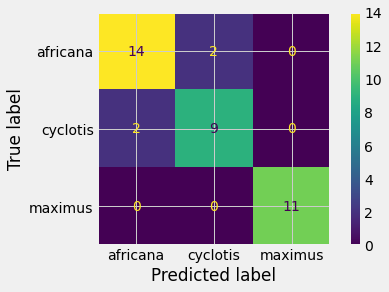

In [26]:
plot_confusion_matrix(gnb, X_test, y_test);

## Comma Survey Example

In [27]:
commas = pd.read_csv('data/comma-survey.csv')

In [28]:
commas.head()

,RespondentID,"In your opinion, which sentence is more gramatically correct?","Prior to reading about it above, had you heard of the serial (or Oxford) comma?","How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?",How would you write the following sentence?,"When faced with using the word ""data"", have you ever spent time considering if the word was a singular or plural noun?","How much, if at all, do you care about the debate over the use of the word ""data"" as a singluar or plural noun?","In your opinion, how important or unimportant is proper use of grammar?",Gender,Age,Household Income,Education,Location (Census Region)
0,3292953864,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Not much,Somewhat important,Male,30-44,"$50,000 - $99,999",Bachelor degree,South Atlantic
1,3292950324,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,Somewhat unimportant,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
2,3292942669,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",Yes,Not at all,Very important,Male,30-44,NaN,NaN,East North Central
3,3292932796,"It's important for a person to be honest, kind...",Yes,Some,"Some experts say it's important to drink milk,...",No,Some,Somewhat important,Male,18-29,NaN,Less than high school degree,Middle Atlantic
4,3292932522,"It's important for a person to be honest, kind...",No,Not much,"Some experts say it's important to drink milk,...",No,Not much,NaN,NaN,NaN,NaN,NaN,NaN


The first question on the survey was about the Oxford comma.

In [29]:
commas.isna().sum().sum()

924

We'll go ahead and drop the NaNs:

In [30]:
commas = commas.dropna()

In [31]:
commas.shape

(825, 13)

In [32]:
commas['In your opinion, which sentence is more gramatically correct?'].value_counts()

It's important for a person to be honest, kind, and loyal.    470
It's important for a person to be honest, kind and loyal.     355
Name: In your opinion, which sentence is more gramatically correct?, dtype: int64

Personally, I like the Oxford comma, since it can help eliminate ambiguities, such as:

"This book is dedicated to my parents, Ayn Rand, and God" <br/> vs. <br/>
"This book is dedicated to my parents, Ayn Rand and God"

Let's see how a Naive Bayes model would make a prediction here. We'll think of the comma preference as our target.

In [33]:
commas['Age'].value_counts()

45-60    248
30-44    205
> 60     199
18-29    173
Name: Age, dtype: int64

Suppose we want to make a prediction about Oxford comma usage for a new person who falls into the **45-60 age group**.

### Calculating Priors and Likelihoods

The following code makes a table of values that count up the number of survey respondents who fall into each of eight bins (the four age groups and the two answers to the first comma question). 

In [34]:
table = np.zeros((2, 4))

for idx, value in enumerate(commas['Age'].value_counts().index):
    table[0, idx] = len(commas[(commas['In your opinion, which sentence is '\
                                       'more gramatically correct?'] ==\
                                        'It\'s important for a person to be '\
                                'honest, kind, and loyal.') & (commas['Age'] == value)])
    table[1, idx] = len(commas[(commas['In your opinion, which sentence is '\
                                       'more gramatically correct?'] ==\
                                        'It\'s important for a person to be '\
                                'honest, kind and loyal.') & (commas['Age'] == value)])

In [35]:
table

array([[123., 121.,  90., 136.],
       [125.,  84., 109.,  37.]])

In [36]:
df = pd.DataFrame(table, columns=['Age45-60',
                            'Age>60',
                            'Age30-44',
                            'Age18-29'])
df

,Age45-60,Age>60,Age30-44,Age18-29
0,123.0,121.0,90.0,136.0
1,125.0,84.0,109.0,37.0


In [37]:
df['Oxford'] = [True, False]
df = df[['Age>60', 'Age45-60', 'Age30-44', 'Age18-29', 'Oxford']]
df

,Age>60,Age45-60,Age30-44,Age18-29,Oxford
0,121.0,123.0,90.0,136.0,True
1,84.0,125.0,109.0,37.0,False


Since all we have is a single categorical feature here we can just read our likelihoods and priors right off of this table:

Likelihoods:

- Age45-60:
    - P(Age45-60 | Oxford=True) = $\frac{123}{470} = 0.2617$;
    - P(Age45-60 | Oxford=False) = $\frac{125}{355} = 0.3521$.

Priors:

- P(Oxford=True) = $\frac{470}{825} = 0.5697$;
- P(Oxford=False) = $\frac{355}{825} = 0.4303$.

### Calculating Posteriors

First we'll calculate the probability of the evidence:

$$\begin{align} 
    P(Age45-60) &= P(Age45-60 | Oxford=True) \cdot P(Oxford=True) \\
                & \hspace{1cm} + P(Age45-60 | Oxford=False) \cdot P(Oxford=False)\\ 
                &= 0.2617 \cdot 0.5697 + 0.3521 \cdot 0.4303 \\
                &= 0.3006
\end{align}$$

In [38]:
(123+125)/825

0.3006060606060606

Now use Bayes's Theorem to calculate the posteriors:

$$\begin{align}
P(Oxford=True | Age45-60) &= P(Oxford=True) \cdot P(Age45-60 | Oxford=True) / P(Age45-60) \\
                          &= 0.5697 \cdot 0.2617 / 0.3006 \\
                          &= 0.4960 \\
                          \\
P(Oxford=False | Age45-60) &= P(Oxford=False) \cdot P(Age45-60 | Oxford=False) / P(Age45-60) \\ 
                          &= 0.4303 \cdot 0.3521 / 0.3006 \\
                          &= 0.5040
\end{align}$$

Close! But our prediction for someone in the 45-60 age group will be that they **do not** favor the Oxford comma.

### Comparison with [`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

In [39]:
comma_model = MultinomialNB()

ohe = OneHotEncoder()
ohe.fit(commas['Age'].values.reshape(-1, 1))

X = ohe.transform(commas['Age'].values.reshape(-1, 1)).todense()
y = commas['In your opinion, which sentence is more gramatically correct?']

In [40]:
comma_model.fit(X, y)

MultinomialNB()

In [41]:
comma_model.predict_proba(np.array([0, 0, 1, 0]).reshape(1, -1))

array([[0.50331754, 0.49668246]])